In [61]:
import os
print(os.getcwd())  


/Users/bayowaonabajo


In [63]:
import os
print(os.listdir())  #files in the current working directory


['Untitled10.ipynb', '.Rhistory', 'Untitled7.ipynb', 'homework-hw1', '.Renviron', '.config', 'Music', '.condarc', 'Bayowa_hw2', 'Untitled5.ipynb', 'Untitled1.ipynb', '.DS_Store', 'untitled1.py', '.CFUserTextEncoding', 'pm25helper.py', '.xonshrc', 'Untitled3.ipynb', 'Untitled.ipynb', 'untitled.md', '.zshrc', 'Untitled4.ipynb', '.local', 'Untitled6.ipynb', 'Pictures', 'f24_data203', '.zprofile', 'mystats.py', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '__pycache__', '.lesshst', 'Bayowa_hw2.txt', 'file1.ipynb', 'README.md', 'untitled.txt', 'Public', '.gitignore', '.idlerc', 'untitled1.txt', '.tcshrc', '.RData', '.virtual_documents', '.anaconda', 'sql_eng_mang_data_interactive_learn_quiz_project', 'Untitled8.ipynb', '.ssh', 'Movies', 'sample', '.Rapp.history', 'hw4finalproject.ipynb', '.Trash', '.ipynb_checkpoints', '.jupyter', '.Renviron_backup', 'Documents', 'file2.ipynb', 'untitled2.py', '.mysql_history', '.git', '.bash_profile', '.Xauthority', '

# HW4 001

In [2]:
from helpers import pm25helper



In [27]:
import pandas as pd
from helpers import pm25helper # Import from local file
from datetime import timedelta
import glob


print("Successfully imported pm25helper")


Successfully imported pm25helper


In [29]:
df = pd.DataFrame()

for f in glob.glob("sample/*.html"):
    start_dt, d = pm25helper.get_ladeq_pm25_data(f)
    
    df_tmp = pd.DataFrame(d).set_index(0)
    df_tmp.columns = [(start_dt+timedelta(i)).strftime("%Y-%m-%d") for i in range(0,3)]

    df = pd.concat([df, df_tmp], axis=1)

df = df.T.sort_index()
df.to_csv("data/mossville_ldeq_cc_forecast_archives.csv")
df.head()
df.tail()

,Baton Rouge,Alexandria,Lake Charles,Lafayette,Monroe,New Orleans,Shreveport,Thibodaux
2024-09-15,50,50,44,50,44,50,53,44
2024-09-16,44,44,39,44,44,44,50,39
2024-10-07,53,53,53,55,55,50,58,50
2024-10-08,55,53,53,53,53,53,56,53
2024-10-09,53,50,50,53,50,53,53,53


In [31]:
import glob
print(glob.glob("sample/*.html"))


['sample/CC-MAIN-2024-33_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-30_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-18_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-42_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-22_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-10_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-38_https:__airquality.deq.louisiana.gov_Forecast.html', 'sample/CC-MAIN-2024-26_https:__airquality.deq.louisiana.gov_Forecast.html']


# Answer #1.
## What the cell above does:
The provided cell extracts and organizes PM2.5 data from HTML files into a structured format which could be dataframe or table.
The code searches for all HTML files in the "sample/" directory with the function glob.glob("sample/*.html").
For each file, the function pm25helper.get_ladeq_pm25_data(f) is used to identify the forecast start date from the HTML file, extract PM2.5 pollution data for multiple locations and days.
Each file's extracted data is temporarily stored in a DataFrame as "df_tmp", where rows correspond to different locations e.g., cities and columns correspond to dates, starting from the forecast start date.
The temporary DataFrame "df_tmp" is appended to a master DataFrame "df" using function pd.concat(). This process repeats for all HTML files, combining data from multiple files into one large DataFrame.
The combined DataFrame is transposed "df.T" and sorted by date to make it easier to analyze.
The final data is saved as a CSV file ("data/mossville_ldeq_cc_forecast_archives.csv") for future use. 
In summary, it opens each file before reading the table for all cities and their pollution levels.It then adds all the tables together into a bigger table where each column is a city, and each row is a day and saves the bigger table into a new file so you we can use it later.

In [34]:
df['Monroe']

2024-02-23    29
2024-02-24    25
2024-02-25    38
2024-04-17    42
2024-04-18    46
2024-04-19    42
2024-05-26    53
2024-05-27    50
2024-05-28    44
2024-06-13    53
2024-06-14    55
2024-06-15    53
2024-07-13    58
2024-07-14    66
2024-07-15    58
2024-08-05    56
2024-08-06    55
2024-08-07    58
2024-09-14    50
2024-09-15    44
2024-09-16    44
2024-10-07    55
2024-10-08    53
2024-10-09    50
Name: Monroe, dtype: int64

# Answer 2.
## What df[monroe] does.
The command df'Monroe' extracts all the PM2.5 readings specifically for the city of Monroe from the DataFrame and it outputs the data as a series, where the index represents the dates, and the values correspond to the PM2.5 readings for Monroe.

# Answer 3.
The highest PM2.5 readings:

In [38]:
highest_pm25 = df.max()
highest_pm25


0
Baton Rouge     75
Alexandria      69
Lake Charles    69
Lafayette       68
Monroe          66
New Orleans     77
Shreveport      75
Thibodaux       77
dtype: int64

# Answer 4.
Lake charles is the closest to mossville geographically so the code below will retrieve all ldeq data on it.

In [41]:
lake_charles_data = df['Lake Charles']
lake_charles_data



2024-02-23    53
2024-02-24    50
2024-02-25    55
2024-04-17    50
2024-04-18    53
2024-04-19    53
2024-05-26    60
2024-05-27    66
2024-05-28    58
2024-06-13    55
2024-06-14    56
2024-06-15    55
2024-07-13    69
2024-07-14    66
2024-07-15    68
2024-08-05    55
2024-08-06    53
2024-08-07    68
2024-09-14    39
2024-09-15    44
2024-09-16    39
2024-10-07    53
2024-10-08    53
2024-10-09    50
Name: Lake Charles, dtype: int64

# Answer 5.
The cities with the highest and lowest AQ means:

In [44]:
# Calculate mean PM2.5 readings for each city
aq_means = df.mean()

# Find the city with the highest and lowest means
highest_mean_city = aq_means.idxmax()
lowest_mean_city = aq_means.idxmin()

highest_mean = aq_means.max()
lowest_mean = aq_means.min()

highest_mean_city, highest_mean, lowest_mean_city, lowest_mean


('Shreveport', 56.416666666666664, 'Monroe', 49.041666666666664)

# Answer 6.
Relevance or irrelevance of the above to Mossville:

# Relevance: 
Lake Charles proximity to Mossville is relevant as its AQ data can serve as a proxy to understand air quality trends in Mossville.
Being in the same region, Mossville and Lake Charles likely share similar weather patterns, industrial emissions, and other environmental factors affecting air quality which could all be useful when making analysis and logical inference.

# Irrelevance:
Mossville might experience specific local air quality issues like emissions from nearby industries that are not captured in Lake Charles data.
Regional averages or city data may mask hyper-local variations in AQ that Mossville residents experience which shows lack of granularity.
Mossville's historical burden of pollution like legacy of industrial activity might make its air quality uniquely worse compared to nearby cities.


# HW4 002

# ANSWER 1
The loop in the cell above does the following
It searches in the folder "/Users/bayowaonabajo/cf_mossville/" for all files and each file is processed one at a time after which the file path is printed for reference.
The data in the file is read using pd.read_csv() into a temporary DataFrame, which uses time_stamp as its index. All the files' data are combined with concatenation (pd.concat) into a single DataFrame "df".
Finally, the index of the DataFrame "df" is converted to datetime format using function pd.to_datetime(), so operations with time values can be done.


In [50]:

import pandas as pd
from   datetime import timedelta
import glob



In [52]:
df = pd.DataFrame()
for f in glob.glob("/Users/bayowaonabajo/cf_mossville/*"):
    print(f)
    df = pd.concat([df, pd.read_csv(f, index_col='time_stamp')])
df.index = pd.to_datetime(df.index)

/Users/bayowaonabajo/cf_mossville/6.csv
/Users/bayowaonabajo/cf_mossville/7.csv
/Users/bayowaonabajo/cf_mossville/5.csv
/Users/bayowaonabajo/cf_mossville/4.csv
/Users/bayowaonabajo/cf_mossville/1.csv
/Users/bayowaonabajo/cf_mossville/3.csv
/Users/bayowaonabajo/cf_mossville/2.csv
/Users/bayowaonabajo/cf_mossville/10.csv
/Users/bayowaonabajo/cf_mossville/9.csv
/Users/bayowaonabajo/cf_mossville/8.csv


/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_8481/170758708.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.read_csv(f, index_col='time_stamp')])


In [54]:
df.columns

Index(['sensor_index', '2.5_um_count', '2.5_um_count_a', '2.5_um_count_b',
       'pm2.5_atm', 'pm2.5_atm_a', 'pm2.5_atm_b', 'pm2.5_cf_1', 'pm2.5_cf_1_a',
       'pm2.5_cf_1_b'],
      dtype='object')

# Answer 2
What the df['pm2.5atm'] does.
The command selects the column named pm2.5_atm from the DataFrame "df". This column contains the PM2.5 air quality readings (fine particulate matter that can affect health).


In [57]:
df['pm2.5_atm'].head()


time_stamp
2024-06-07 03:30:00+00:00    17.555
2024-06-07 13:40:00+00:00    15.774
2024-06-07 13:10:00+00:00    23.335
2024-06-07 02:50:00+00:00    14.551
2024-06-07 08:10:00+00:00    28.291
Name: pm2.5_atm, dtype: float64

# Answer 3
What does this command "df = df.resample("1d").mean()[['pm2.5_atm']]" do.

"resample("1d")" groups the data by day,".mean()" calculates the daily average for each group, "[['pm2.5_atm']]" selects the pm2.5_atm column only and all the above is combined to get the average PM2.5 air quality for the day.


In [60]:
df = df.resample("1d").mean()[['pm2.5_atm']]
df.head()

,pm2.5_atm
time_stamp,
2024-02-25 00:00:00+00:00,9.929602
2024-02-26 00:00:00+00:00,19.305769
2024-02-27 00:00:00+00:00,11.951812
2024-02-28 00:00:00+00:00,18.240583
2024-02-29 00:00:00+00:00,2.606073


# Answer 4

In [63]:
top5_days = df.nlargest(5, 'pm2.5_atm')
top5_days


,pm2.5_atm
time_stamp,
2024-05-09 00:00:00+00:00,50.802882
2024-10-10 00:00:00+00:00,42.433854
2024-05-27 00:00:00+00:00,42.290444
2024-08-06 00:00:00+00:00,34.427840
2024-05-28 00:00:00+00:00,32.614406


In [65]:
top5_days = df.nsmallest(4, 'pm2.5_atm')
top5_days


,pm2.5_atm
time_stamp,
2024-08-31 00:00:00+00:00,1.670590
2024-02-29 00:00:00+00:00,2.606073
2024-03-19 00:00:00+00:00,2.832826
2024-07-22 00:00:00+00:00,2.837292


# Answer 5
## What the command "df.to_csv("data/mossville_pa_hmeans.csv")" does.
This command saves the processed DataFrame "df" to a CSV file named mossville_pa_hmeans.csv in the data directory/folder and creates a permanent record of the sampled data that can be shared, analyzed further, or used in reports.

In [68]:
import pandas as pd

In [70]:
df.to_csv("data/mossville_pa_hmeans.csv")


# HW4 003
## Answer1
What the forum post is about

The forum post explains how to calculate the Air Quality Index (AQI) from PM2.5 measurements using the U.S. EPA guidelines and discusses the process of converting PM2.5 concentrations measured in micrograms per cubic meter into an AQI value using a formula based on breakpoint tables. 
This helps standardize PM2.5 measurements into a format that's easier to interpret.


In [73]:
df.tail()

,pm2.5_atm
time_stamp,
2024-10-27 00:00:00+00:00,21.907722
2024-10-28 00:00:00+00:00,16.608458
2024-10-29 00:00:00+00:00,16.922208
2024-10-30 00:00:00+00:00,13.041007
2024-10-31 00:00:00+00:00,8.032521


In [75]:
import pandas as pd
df = pd.read_csv("data/mossville_pa_hmeans.csv").set_index("time_stamp")
df.head()

,pm2.5_atm
time_stamp,
2024-02-25 00:00:00+00:00,9.929602
2024-02-26 00:00:00+00:00,19.305769
2024-02-27 00:00:00+00:00,11.951813
2024-02-28 00:00:00+00:00,18.240583
2024-02-29 00:00:00+00:00,2.606073


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2024-02-25 00:00:00+00:00 to 2024-10-31 00:00:00+00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pm2.5_atm  250 non-null    float64
dtypes: float64(1)
memory usage: 3.9+ KB


In [80]:
df['pm2.5_atm'].describe()

count    250.000000
mean      13.782220
std        7.523293
min        1.670590
25%        8.255626
50%       12.932281
75%       17.783620
max       50.802882
Name: pm2.5_atm, dtype: float64

In [82]:
df['pm2.5_atm'].max()

50.80288194444445

In [84]:
df[df['pm2.5_atm'] == df['pm2.5_atm'].max()]

,pm2.5_atm
time_stamp,
2024-05-09 00:00:00+00:00,50.802882


In [86]:
df.isnull().sum()


pm2.5_atm    0
dtype: int64

In [88]:
df.tail()

,pm2.5_atm
time_stamp,
2024-10-27 00:00:00+00:00,21.907722
2024-10-28 00:00:00+00:00,16.608458
2024-10-29 00:00:00+00:00,16.922208
2024-10-30 00:00:00+00:00,13.041007
2024-10-31 00:00:00+00:00,8.032521


# Answer 2
Explanation:

pm25_to_aqi function takes raw PM2.5 measurements and converts them into an AQI score. AQI is calculated based on formulas that categorize air quality into health-related bands.

.apply() applies the pm25_to_aqi function to every value in the pm2.5_atm column.

The AQI values are added as a new column named pm2.5_aqi then the updated data is saved to a new csv file, making it easier to share or analyze later.

df.head() displays the first few rows of the updated data for verification.

Summary: This code turns those numbers into easy-to-understand scores adds those scores to a table, and saves everything in a new readable file.

In [94]:
import pandas as pd
from  pm25helper import pm25_to_aqi

df['pm2.5_aqi'] = df['pm2.5_atm'].apply(pm25_to_aqi)
df.to_csv("data/mossville_pa_hmeans_aqi.csv")
df.head()

,pm2.5_atm,pm2.5_aqi
time_stamp,,
2024-02-25 00:00:00+00:00,9.929602,41.373342
2024-02-26 00:00:00+00:00,19.305769,65.364394
2024-02-27 00:00:00+00:00,11.951813,49.799219
2024-02-28 00:00:00+00:00,18.240583,63.124255
2024-02-29 00:00:00+00:00,2.606073,10.858637


In [96]:
import os
print(os.listdir('/Users/bayowaonabajo/helpers'))


['pm25helper.py', 'pahelper.py', '.ipynb_checkpoints', 'cchelper.py']


# Answer 3


# What does pm25_to_aqi do, and why is it necessary.

The function 'pm25_to_aqi' converts raw PM2.5 measurements into the AQI using a standardized formula provided by organizations like the Environmental Protection Agency (EPA). 
This involves matching ranges where PM2.5 levels are divided into ranges, and each range corresponds to a specific AQI range.

If the PM2.5 value falls within a range, the AQI is calculated using a mathematical formula to find the exact value.

PM2.5 values alone don't tell us how good or bad the air is for health. The AQI translates these scientific values into a scale that people can understand, with health warnings and color codes (green for safe, red for unhealthy, etc.). This is necessary for people to make decisions, like staying indoors on bad air days.








# HW 004

In [101]:
import pandas as pd
## LOAD PA AQI MEANS
df_a = pd.read_csv("data/mossville_pa_hmeans_aqi.csv").set_index("time_stamp")
df_a.index = pd.to_datetime(df_a.index)
df_a.index = df_a.index.tz_convert(None)
df_a.columns = ["Mossville_PA_PM2.5", "Mossville_PA_AQI"]
df_a.head()

,Mossville_PA_PM2.5,Mossville_PA_AQI
time_stamp,,
2024-02-25,9.929602,41.373342
2024-02-26,19.305769,65.364394
2024-02-27,11.951813,49.799219
2024-02-28,18.240583,63.124255
2024-02-29,2.606073,10.858637


In [103]:
df_a.describe()

,Mossville_PA_PM2.5,Mossville_PA_AQI
count,250.000000,250.000000
mean,13.782220,49.697538
std,7.523293,20.642189
min,1.670590,6.960793
25%,8.255626,34.398441
50%,12.932281,51.960634
75%,17.783620,62.163238
max,50.802882,138.733665


In [105]:
## LOAD FORECASTED DATA
df_b = pd.read_csv("data/mossville_ldeq_cc_forecast_archives.csv", index_col=0)
df_b.index = pd.to_datetime(df_b.index)
df_b.head()

,Baton Rouge,Alexandria,Lake Charles,Lafayette,Monroe,New Orleans,Shreveport,Thibodaux
2024-02-23,46,42,53,42,29,42,38,38
2024-02-24,42,38,50,38,25,38,33,33
2024-02-25,53,42,55,46,38,50,46,46
2024-04-17,53,50,50,42,42,42,55,46
2024-04-18,50,46,53,50,46,46,55,50


In [107]:
#MERGE
df = df_b.merge(df_a, left_index=True, right_index=True)[['Lake Charles', 'Mossville_PA_AQI']]
df

,Lake Charles,Mossville_PA_AQI
2024-02-25,55,41.373342
2024-04-17,50,68.348391
2024-04-18,53,72.166360
2024-04-19,53,67.546837
2024-05-26,60,67.695686
2024-05-27,66,117.880070
2024-05-28,58,93.353115
2024-06-13,55,74.105021
2024-06-14,56,67.668682
2024-06-15,55,83.827419


In [109]:
## COMPUTE DELTAS COLUMN
df['PA_Forecast_Delta'] = df['Lake Charles'] - df['Mossville_PA_AQI']
df.head()

,Lake Charles,Mossville_PA_AQI,PA_Forecast_Delta
2024-02-25,55,41.373342,13.626658
2024-04-17,50,68.348391,-18.348391
2024-04-18,53,72.166360,-19.166360
2024-04-19,53,67.546837,-14.546837
2024-05-26,60,67.695686,-7.695686


# Answer 1
## Why is "Lake Charles" chosen as the data column in the cell above.

Lake Charles is chosen as it represents the geographically closest location with AQI data to Mossville. Proximity makes it a logical candidate for comparing forecasted air quality with the actual AQI recorded by the Mossville PurpleAir monitor.

# Answer 2

The lake charles forecasted data doesnt match the actual mossville purple air AQI data.
The mean AQI for Lake Charles (55.36) is significantly lower than Mossville's (71.06), indicating a systematic difference.While the standard deviation of Mossville's AQI is higher (18.17 vs. 8.48), suggesting greater variability in Mossville's readings.
Yes, i agree the minimum values are close, with Lake Charles at 39 and Mossville at 41.37 which could be due to an error, or incomplete data transformation etc.

In [114]:
df.describe()

,Lake Charles,Mossville_PA_AQI,PA_Forecast_Delta
count,22.000000,22.000000,22.000000
mean,55.363636,71.064714,-15.701077
std,8.482730,18.172538,17.151603
min,39.000000,41.373342,-51.880070
25%,53.000000,57.306550,-22.230613
50%,55.000000,68.022038,-15.701469
75%,59.500000,81.396819,-6.460177
max,69.000000,117.880070,17.627176


# Answer 3

Lake Charles's worst AQI values (69, 68, etc.) overlap with Mossville's higher AQI values (72.39, 90.15). However, the largest discrepancy occurs on days like May 27th, where Mossville's AQI is over 117 compared to Lake Charles's 66. This indicates that worst-case scenarios in Mossville can be underestimated by Lake Charles forecasts.

The best AQ days in Mossville (minimum AQI 41) align closely with Lake Charles's minimum AQI (39), supporting a more consistent relationship for lower AQI ranges.

In [117]:
df.nlargest(5, 'Lake Charles')

,Lake Charles,Mossville_PA_AQI,PA_Forecast_Delta
2024-07-13,69,72.392438,-3.392438
2024-07-15,68,50.372824,17.627176
2024-08-07,68,90.150456,-22.150456
2024-05-27,66,117.880070,-51.880070
2024-07-14,66,57.739215,8.260785


In [119]:
df.nsmallest(5, 'Mossville_PA_AQI')

,Lake Charles,Mossville_PA_AQI,PA_Forecast_Delta
2024-02-25,55,41.373342,13.626658
2024-07-15,68,50.372824,17.627176
2024-09-14,39,53.219769,-14.219769
2024-09-15,44,54.650901,-10.650901
2024-09-16,39,55.856102,-16.856102


# Answer 4

Mean AQI (49.7) falls in the "Good" to "Moderate" category. This implies air quality is acceptable but may pose concerns for some groups.
Median AQI (51.9) reinforces the "Moderate" categorization.
Max AQI (138.7) falls in the "Unhealthy" for Sensitive Groups range, signaling potential health impacts during peak pollution days.
Mossville's AQI indicates generally good air quality but with some days that could be concerning, especially for sensitive individuals such as those with respiratory illnesses. The AQI scale classifies air quality into six levels, ranging from "Good" (0–50) to "Hazardous" (301+). Mossville's data mostly stays within acceptable ranges but shows variability requiring attention during high AQI days.

In [122]:
df_a['Mossville_PA_AQI'].describe()

count    250.000000
mean      49.697538
std       20.642189
min        6.960793
25%       34.398441
50%       51.960634
75%       62.163238
max      138.733665
Name: Mossville_PA_AQI, dtype: float64

# HW4 005

In [125]:
import pandas as pd

In [127]:
## LOAD THE PA AQI MEANS
df_a = pd.read_csv("data/mossville_pa_hmeans_aqi.csv").set_index("time_stamp")
df_a.index = pd.to_datetime(df_a.index)
df_a.index = df_a.index.tz_convert(None)
df_a.columns = ["Mossville_PA_PM2.5", "Mossville_PA_AQI"]


## LOAD THE FORECASTED DATA
df_b = pd.read_csv("data/mossville_ldeq_cc_forecast_archives.csv", index_col=0)
df_b.index = pd.to_datetime(df_b.index)

## MERGE THE DATA
df = df_b.merge(df_a, left_index=True, right_index=True)[['Lake Charles', 'Mossville_PA_AQI']]


## COMPUTE DELTAS COLUMN
df['PA_Forecast_Delta'] = df['Lake Charles'] - df['Mossville_PA_AQI']
df.index = df.index.date

<Axes: >

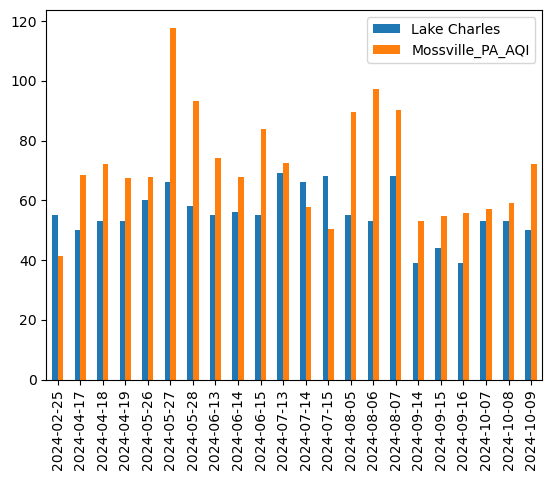

In [129]:
df[['Lake Charles', 'Mossville_PA_AQI']] \
    .plot(kind="bar", rot=90)

# Answer 1: Explanation of the Plot

The plot generated by the code displays a bar chart that compares two variables Lake Charles Forecasted AQI
Represented on the y-axis and Mossville Purple Air AQI

Time is represented on the x-axis with each bar corresponding to a specific date shown in a 90 degree angle for clarity. The dates elucidate the intersection of the data from both datasets.

Further Observations:

Each date has two bars which are one for the Lake Charles forecast and one for the Mossville PA AQI.
The heights of these bars represent the respective AQI values.

The relative heights of the bars indicate how closely the forecasted AQI for Lake Charles aligns with the observed AQI in Mossville and any significant discrepancies between the two are immediately visible as large differences in bar heights for the same date.

The bar chart helps in visually analyzing both the accuracy of the Lake Charles AQI forecast when compared to the Mossville PurpleAir AQI and trends over time where one dataset consistently underestimates or overestimates AQI values relative to the other.